<a href="https://colab.research.google.com/github/hanafimajid/h2o-mtr/blob/main/h2o_andro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the H2O package
!pip install h2o
# Importing necessary packages
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.7 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnzwi3k8m
  JVM stdout: /tmp/tmpnzwi3k8m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnzwi3k8m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_bramry
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving csv_result-andro.csv to csv_result-andro.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-andro.csv")
df.head()
y_col = [
'Target',
'Target_2',
'Target_3',
'Target_4',
'Target_5',
'Target_6'
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

,Target,Target_2,Target_3,Target_4,Target_5,Target_6
0,15.17,5.14,46.0,30.4,46.8,3.74
1,14.85,5.11,47.0,31.2,46.8,3.78
2,14.72,5.10,48.0,31.7,42.7,3.40
3,15.28,5.11,48.0,32.0,42.5,3.38
4,16.15,5.13,47.0,30.8,42.1,3.27


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
X_train.head(10)

,Window0-Att0,Window0-Att1,Window0-Att2,Window0-Att3,Window0-Att4,Window0-Att5,Window1-Att0,Window1-Att1,Window1-Att2,Window1-Att3,...,Window3-Att2,Window3-Att3,Window3-Att4,Window3-Att5,Window4-Att0,Window4-Att1,Window4-Att2,Window4-Att3,Window4-Att4,Window4-Att5
21,20.700,6.660,49.00,32.70,82.20,5.850,21.660,6.680,47.00,30.7,...,45.00,29.30,94.90,6.740,22.790,6.715,44.0,28.9,130.5,9.140
46,21.535,6.590,44.65,28.85,86.90,6.225,21.985,6.580,44.15,28.5,...,42.70,27.50,87.50,6.125,23.685,6.600,42.7,27.5,85.5,5.945
11,14.850,5.110,47.00,31.20,46.80,3.780,14.720,5.100,48.00,31.7,...,47.00,30.80,42.10,3.270,17.290,5.130,47.0,30.6,48.1,3.710
41,19.900,6.575,50.85,33.45,78.85,5.575,20.830,6.580,49.55,32.5,...,47.35,30.85,82.70,5.900,21.350,6.600,46.0,29.9,84.3,5.980
5,13.340,5.130,46.00,30.10,42.60,3.550,13.630,5.110,48.00,31.3,...,45.00,29.70,45.10,3.750,14.750,5.150,45.0,29.7,51.6,4.230
1,12.010,5.090,48.00,32.00,14.80,1.250,12.890,5.100,48.00,31.9,...,45.00,29.70,38.50,3.270,13.340,5.130,46.0,30.1,42.6,3.550
6,13.630,5.110,48.00,31.30,46.00,3.790,14.270,5.120,47.00,31.1,...,45.00,29.70,51.60,4.230,15.170,5.140,46.0,30.4,46.8,3.740
27,23.540,6.690,45.00,29.70,112.80,7.760,24.590,6.690,45.00,29.8,...,47.00,30.70,91.30,6.250,23.940,6.670,47.2,30.8,80.1,5.435
44,20.940,6.600,47.35,30.85,82.70,5.900,21.350,6.600,46.00,29.9,...,44.15,28.50,92.65,6.630,22.700,6.600,42.3,27.2,98.7,7.000
24,22.240,6.710,45.00,29.30,94.90,6.740,22.790,6.715,44.00,28.9,...,45.00,29.70,112.80,7.760,24.590,6.690,45.0,29.8,109.7,7.540


In [ ]:
from h2o.sklearn import H2OAutoMLRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg=H2OAutoMLRegressor(stopping_metric="RMSE",max_runtime_secs=240,keep_cross_validation_predictions = True, max_models=100, seed=42, sort_metric="RMSE")
      #reg=H2OAutoML(stopping_metric="RMSE",sort_metric="RMSE",nfolds=10)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      #h2o.make_leaderboard(reg,extra_columns = 'ALL')


      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y

In [ ]:
import numpy as np

#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
16:02:30.562: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 39.0.

█████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
16:06:33.616: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 39.0.

█████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |██████████

In [ ]:
y_train

,Target,Target_2,Target_3,Target_4,Target_5,Target_6
21,23.940,6.670,47.20,30.80,80.10,5.435
46,27.445,6.605,40.90,26.20,44.75,2.890
11,20.700,6.660,49.00,32.70,82.20,5.850
41,23.700,6.600,42.45,27.30,84.35,5.845
5,17.290,5.130,47.00,30.60,48.10,3.710
1,14.850,5.110,47.00,31.20,46.80,3.780
6,18.020,5.150,46.00,29.90,75.30,5.590
27,24.170,6.610,49.80,32.70,99.85,6.640
44,26.355,6.590,41.10,26.35,63.60,4.295
24,23.630,6.620,49.80,32.70,81.40,5.470


In [ ]:
X_test

,Window0-Att0,Window0-Att1,Window0-Att2,Window0-Att3,Window0-Att4,Window0-Att5,Window1-Att0,Window1-Att1,Window1-Att2,Window1-Att3,...,Window3-Att2,Window3-Att3,Window3-Att4,Window3-Att5,Window4-Att0,Window4-Att1,Window4-Att2,Window4-Att3,Window4-Att4,Window4-Att5
10,15.170,5.14,46.0,30.4,46.8,3.740,14.850,5.110,47.00,31.20,...,48.00,32.00,42.50,3.380,16.15,5.13,47.00,30.80,42.1,3.27
13,15.280,5.11,48.0,32.0,42.5,3.380,16.150,5.130,47.00,30.80,...,46.00,29.90,75.30,5.590,18.73,5.15,46.00,30.30,72.5,5.31
30,23.665,6.67,47.0,30.7,91.3,6.250,23.940,6.670,47.20,30.80,...,49.60,32.50,80.10,5.400,23.63,6.62,49.80,32.70,81.4,5.47
48,22.700,6.60,42.3,27.2,98.7,7.000,23.580,6.605,42.70,27.50,...,42.45,27.30,84.35,5.845,25.69,6.61,41.80,26.90,78.0,5.29
18,19.570,5.14,47.0,30.8,61.9,4.540,20.960,6.650,48.00,31.50,...,49.00,32.70,82.20,5.850,21.66,6.68,47.00,30.70,94.8,6.63
0,11.840,5.08,49.0,32.2,16.5,1.400,12.010,5.090,48.00,32.00,...,47.00,30.80,20.20,1.640,13.75,5.13,45.00,29.70,38.5,3.27
40,18.715,6.55,52.6,34.7,67.8,4.935,19.900,6.575,50.85,33.45,...,48.45,31.65,81.30,5.810,20.94,6.60,47.35,30.85,82.7,5.90
12,14.720,5.10,48.0,31.7,42.7,3.400,15.280,5.110,48.00,32.00,...,47.00,30.60,48.10,3.710,18.02,5.15,46.00,29.90,75.3,5.59
29,23.990,6.68,46.0,30.1,95.6,6.480,23.665,6.670,47.00,30.70,...,50.10,32.90,81.45,5.660,23.55,6.63,49.60,32.50,80.1,5.40
8,14.190,5.15,45.0,29.7,45.1,3.750,14.750,5.150,45.00,29.70,...,47.00,31.20,46.80,3.780,14.72,5.10,48.00,31.70,42.7,3.40


In [ ]:
Ypred2 = reg2.predict(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

In [ ]:
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.643321347164605


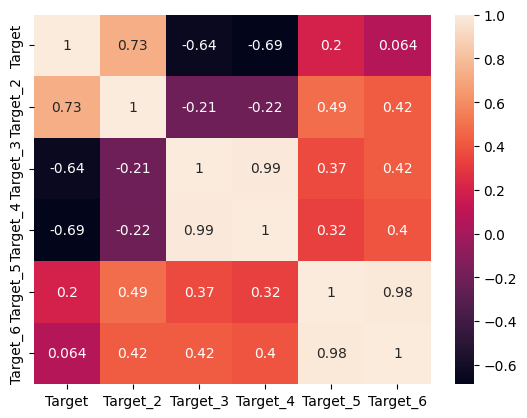

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Target',
'Target_2',
'Target_3',
'Target_4',
'Target_5',
'Target_6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
Ypred2

array([[20.61640896,  6.64399719, 49.90583358, 32.95290873, 94.99242648,
         6.72111212],
       [20.81527421,  6.65316582, 47.08333672, 31.12315554, 69.94803257,
         5.33545973],
       [21.77086918,  6.61026812, 50.21733571, 33.15380024, 88.13435902,
         6.05217738],
       [26.56480059,  6.59449053, 41.65183074, 26.42712742, 37.07670649,
         2.36126761],
       [23.06493808,  6.65712452, 46.32561912, 29.93441559, 92.88690964,
         6.37723583],
       [15.10714169,  5.11143112, 49.72563676, 33.11047749, 33.12088602,
         2.86371758],
       [23.5218679 ,  6.60809517, 42.31759599, 27.35287667, 78.54935296,
         5.62209276],
       [20.64854252,  6.65473461, 48.46416983, 32.16449177, 70.44254211,
         5.35364114],
       [22.47088893,  6.61385441, 51.06631952, 33.36960111, 93.81483015,
         6.3805845 ],
       [19.46094977,  5.25938749, 47.82661789, 31.12905541, 75.72567325,
         5.478941  ]])

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 8.081941412191133
MAE  is 3.55587146689343
rmse_per_output: [ 1.28575996  0.04991885  1.86522045  1.32550781 19.58567409  1.19010234]
relative_root_mean_squared_error = Target      0.004147
Target_2    0.000161
Target_3    0.006016
Target_4    0.004275
Target_5    0.063166
Target_6    0.003838
dtype: float64
arrmse = 0.013600407150366171
Percentage arrmse = 1.36%
